In [189]:
import pandas as pd

otu_df = pd.read_csv('dataframes/OTU.txt', sep='\t')
hiera_blast = pd.read_csv('dataframes/hiera_BLAST.txt', sep='\t')
meta_map = pd.read_csv('dataframes/MCOSIS_map.txt', sep='\t')
meta = pd.read_csv('dataframes/antibiotics kazakh finished.csv', sep='\t')

In [190]:
meta = meta[['ID', 'sample', 'day of research', 'intervention', 'date of birth']]
meta_map_expanded = meta_map.set_index('#SampleID').fastqFile.str.split(',', expand=True).stack().reset_index(name='fastqFile').drop('level_1', axis=1)

# Соединение таблиц
merged = pd.merge(meta, meta_map_expanded, left_on='ID', right_on='fastqFile')

# Замена старых значений 'ID' на новые из '#SampleID'
meta['ID'] = merged['#SampleID']

# Показываем результат
meta

,ID,sample,day of research,intervention,date of birth
0,SMPL0,1,40,yes,23.10.2012
1,SMPL1,1,45,yes,23.10.2012
2,SMPL2,1,50,yes,23.10.2012
3,SMPL3,1,55,yes,23.10.2012
4,SMPL4,1,60,yes,23.10.2012
...,...,...,...,...,...
108,SMPL108,5,5,no,21.08.2014
109,SMPL109,5,15,no,21.08.2014
110,SMPL110,6,1,no,15.04.2014
111,SMPL111,6,5,no,15.04.2014


In [191]:
# Транспонирование otu_df
otu_df_transposed = otu_df.set_index('OTU').T
otu_df_transposed = otu_df_transposed.reset_index().rename(columns={'index': 'SampleID'})

# Переименование столбцов в meta_result для соответствия с otu_df_transposed
meta_result = meta.rename(columns={'ID': 'SampleID', 'intervention': 'GROUP'})

# Объединение таблиц
merged_df = pd.merge(meta_result, otu_df_transposed, on='SampleID')

# Переименование столбцов OTU
for col in merged_df.columns:
    if 'OTU' in col:
        merged_df = merged_df.rename(columns={col: col.replace('OTU_', 'OTU')})

# Вывод результата
merged_df_group = merged_df.drop(columns=['GROUP', 'date of birth'])
merged_df = merged_df.drop(columns=['GROUP', 'date of birth'])

merged_df

,SampleID,sample,day of research,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,...,OTU4190,OTU4191,OTU4192,OTU4193,OTU4194,OTU4195,OTU4196,OTU4197,OTU4198,OTU4199
0,SMPL0,1,40,12,0,26,0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SMPL1,1,45,416,60,672,1,1641,59,0,...,0,0,0,0,0,0,0,0,0,0
2,SMPL2,1,50,101,8,7,0,567,1,0,...,0,0,0,0,0,0,0,0,0,0
3,SMPL3,1,55,3161,1505,11,0,3890,1,3,...,0,0,0,0,0,0,0,0,0,0
4,SMPL4,1,60,15,3,2,8,123,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,SMPL107,5,55,0,1,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
108,SMPL108,5,5,2452,1782,0,0,34,7,19,...,0,0,0,0,0,0,0,0,0,0
109,SMPL109,5,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,SMPL110,6,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
meta['SampleID'] = merged_df_group['SampleID'].astype(str)

# Удаление строк, где 'SampleID' равен 'nan'
meta = meta[meta['SampleID'] != 'nan']

# Теперь можно использовать dropna() для удаления оставшихся строк с NaN, если они есть
meta = meta.dropna(subset=['SampleID'])
meta['ID'] = meta.apply(lambda row: row['ID'] + '_before' if row['day of research'] <= 30 else row['ID'] + '_after', axis=1)
meta

,ID,sample,day of research,intervention,date of birth,SampleID
0,SMPL0_after,1,40,yes,23.10.2012,SMPL0
1,SMPL1_after,1,45,yes,23.10.2012,SMPL1
2,SMPL2_after,1,50,yes,23.10.2012,SMPL2
3,SMPL3_after,1,55,yes,23.10.2012,SMPL3
4,SMPL4_after,1,60,yes,23.10.2012,SMPL4
...,...,...,...,...,...,...
107,SMPL107_after,5,55,no,21.08.2014,SMPL107
108,SMPL108_before,5,5,no,21.08.2014,SMPL108
109,SMPL109_before,5,15,no,21.08.2014,SMPL109
110,SMPL110_before,6,1,no,15.04.2014,SMPL110


In [193]:
before_research_df = meta[meta['day of research'] <= 30]
after_research_df = meta[meta['day of research'] > 30]
before_research_df['ID'] = before_research_df.apply(lambda row: row['ID'] + '_yes' if row['intervention'] == 'yes' else row['ID'] + '_no', axis=1)
after_research_df['ID'] = after_research_df.apply(lambda row: row['ID'] + '_yes' if row['intervention'] == 'yes' else row['ID'] + '_no', axis=1)
before_research_df.head()

/tmp/ipykernel_8450/2424758884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_research_df['ID'] = before_research_df.apply(lambda row: row['ID'] + '_yes' if row['intervention'] == 'yes' else row['ID'] + '_no', axis=1)
/tmp/ipykernel_8450/2424758884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_research_df['ID'] = after_research_df.apply(lambda row: row['ID'] + '_yes' if row['intervention'] == 'yes' else row['ID'] + '_no', axis=1)


,ID,sample,day of research,intervention,date of birth,SampleID
5,SMPL5_before_no,2,1,no,09.12.2014,SMPL5
6,SMPL6_before_no,2,1,no,09.12.2014,SMPL6
7,SMPL7_before_no,2,2,no,09.12.2014,SMPL7
8,SMPL8_before_no,2,3,no,09.12.2014,SMPL8
9,SMPL9_before_no,2,4,no,09.12.2014,SMPL9


In [194]:
import pandas as pd

otu_df_transposed = otu_df.set_index('OTU').T
otu_df_transposed = otu_df_transposed.reset_index().rename(columns={'index': 'SampleID'})

# Объединение таблиц для before
merged_before_df = pd.merge(before_research_df, otu_df_transposed, on='SampleID', how='left')
merged_after_df = pd.merge(after_research_df, otu_df_transposed, on='SampleID', how='left')

# Переименование столбцов OTU
for col in merged_before_df.columns:
    if 'OTU' in col:
        merged_before_df = merged_before_df.rename(columns={col: col.replace('OTU_', 'OTU')})
for col in merged_after_df.columns:
    if 'OTU' in col:
        merged_after_df = merged_after_df.rename(columns={col: col.replace('OTU_', 'OTU')})

# Удаление ненужных столбцов
merged_before_df_group = merged_before_df.drop(columns=['intervention', 'date of birth', 'sample', 'day of research', 'SampleID'])
merged_after_df_group = merged_after_df.drop(columns=['intervention', 'date of birth',  'sample', 'day of research', 'SampleID'])

In [195]:
merged_after_df_group.head()

,ID,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU4190,OTU4191,OTU4192,OTU4193,OTU4194,OTU4195,OTU4196,OTU4197,OTU4198,OTU4199
0,SMPL0_after_yes,12,0,26,0,14,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,SMPL1_after_yes,416,60,672,1,1641,59,0,33,2,...,0,0,0,0,0,0,0,0,0,0
2,SMPL2_after_yes,101,8,7,0,567,1,0,11,3,...,0,0,0,0,0,0,0,0,0,0
3,SMPL3_after_yes,3161,1505,11,0,3890,1,3,64,283,...,0,0,0,0,0,0,0,0,0,0
4,SMPL4_after_yes,15,3,2,8,123,2,1,2,2,...,0,0,0,0,0,0,0,0,0,0


In [196]:
for col in hiera_blast.columns[1:]: 
    hiera_blast[col] = col[0].lower() + '_' + hiera_blast[col]

hiera_blast['OTU'] = hiera_blast['OTU'].str.replace('_', '')

hiera_blast['Taxonomy'] = hiera_blast['Domain'] + '|' + \
                        hiera_blast['Phylum'] + '|' + \
                        hiera_blast['Class'] + '|' + \
                        hiera_blast['Order'] + '|' + \
                        hiera_blast['Family'] + '|' + \
                        hiera_blast['Genus'] + '|' + \
                        hiera_blast['Species']

hiera_blast = hiera_blast[['OTU', 'Taxonomy']]

hiera_blast.head()

,OTU,Taxonomy
0,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...
1,OTU4149,d_Bacteria|p_Firmicutes|c_Clostridia|o_Clostri...
2,OTU4093,d_Bacteria|p_Firmicutes|c_Clostridia|o_Clostri...
3,OTU4078,d_Bacteria|p_Firmicutes|c_Clostridia|o_Clostri...
4,OTU4073,d_Bacteria|p_Firmicutes|c_Clostridia|o_Clostri...


In [197]:
long_merged_after_df_group = pd.melt(merged_after_df_group, id_vars=['ID'], var_name='OTU', value_name='Value')
long_merged_after_df_group_group = pd.melt(merged_after_df_group, id_vars=['ID'], var_name='OTU', value_name='Value')

# Объединяем hiera_blast с long_merged_after_df_group по столбцу 'OTU'
merged_result = pd.merge(hiera_blast, long_merged_after_df_group, on='OTU', how='inner')
merged_after_df_group_group_result = pd.merge(hiera_blast, long_merged_after_df_group_group, on='OTU', how='inner')

merged_after_df_group_group_result.head()

,OTU,Taxonomy,ID,Value
0,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL0_after_yes,0
1,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL1_after_yes,0
2,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL2_after_yes,0
3,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL3_after_yes,0
4,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL4_after_yes,0


In [198]:
long_merged_merged_before_df_group = pd.melt(merged_before_df_group, id_vars=['ID'], var_name='OTU', value_name='Value')
long_merged_merged_before_df_group_group = pd.melt(merged_before_df_group, id_vars=['ID'], var_name='OTU', value_name='Value')

# Объединяем hiera_blast с long_merged_merged_before_df_group по столбцу 'OTU'
merged_result = pd.merge(hiera_blast, long_merged_merged_before_df_group, on='OTU', how='inner')
merged_before_df_group_group_result = pd.merge(hiera_blast, long_merged_merged_before_df_group_group, on='OTU', how='inner')
merged_before_df_group_group_result

,OTU,Taxonomy,ID,Value
0,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL5_before_no,0
1,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL6_before_no,0
2,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL7_before_no,0
3,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL8_before_no,0
4,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL9_before_no,0
...,...,...,...,...
79706,OTU12,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL102_before_no,0
79707,OTU12,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL108_before_no,0
79708,OTU12,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL109_before_no,0
79709,OTU12,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL110_before_no,0


In [199]:
def lacto_bifido_coll_corio_group(df):
    data = df.copy()
    return data[data['Taxonomy'].str.contains('Lactobacillales|Bifidobacteriales|Collinsella|Coriobacteriales', na=False)]

merged_before_df_result = lacto_bifido_coll_corio_group(merged_before_df_group_group_result)
merged_after_df_result = lacto_bifido_coll_corio_group(merged_after_df_group_group_result)
merged_after_df_result.head()

,OTU,Taxonomy,ID,Value
1287,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL0_after_yes,0
1288,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL1_after_yes,0
1289,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL2_after_yes,0
1290,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL3_after_yes,0
1291,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL4_after_yes,0


In [200]:
def to_pivot(df):
    data = df.copy()

    # Создание нового столбца 'Sample_Group'
    data['№'] = data['ID']

    # Создание сводной таблицы
    pivot_df = data.pivot_table(index='Taxonomy', columns='№', values='Value', aggfunc='sum', fill_value=0)

    # Сброс индекса, чтобы 'Taxonomy' стал столбцом
    pivot_df.reset_index(inplace=True)

    # Вывод первых нескольких строк полученного DataFrame для проверки
    return pivot_df

viz_after = to_pivot(merged_after_df_result)
viz_before = to_pivot(merged_before_df_result)

viz_after.head()

№,Taxonomy,SMPL0_after_yes,SMPL103_after_no,SMPL104_after_no,SMPL105_after_no,SMPL107_after_no,SMPL19_after_yes,SMPL1_after_yes,SMPL20_after_yes,SMPL21_after_yes,...,SMPL88_after_no,SMPL89_after_no,SMPL90_after_no,SMPL91_after_yes,SMPL92_after_yes,SMPL93_after_no,SMPL94_after_no,SMPL95_after_no,SMPL96_after_no,SMPL97_after_no
0,d_Bacteria|p_Actinobacteria|c_Actinobacteria|o...,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
1,d_Bacteria|p_Actinobacteria|c_Actinobacteria|o...,0,0,0,0,0,7,0,12,1,...,0,0,0,0,0,0,0,0,0,0
2,d_Bacteria|p_Actinobacteria|c_Actinobacteria|o...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d_Bacteria|p_Actinobacteria|c_Coriobacteriia|o...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,d_Bacteria|p_Actinobacteria|c_Coriobacteriia|o...,0,0,0,0,1,24,31,2,2,...,0,0,1,12,0,1,0,0,0,5


In [201]:
def rename_columns(column_name):
    # Разделяем имя столбца по '_'
    parts = column_name.split('_')
    # Удаляем дубликаты, сохраняя порядок
    unique_parts = []
    for part in parts:
        if part not in unique_parts:
            unique_parts.append(part)
    # Объединяем обратно в строку
    return '_'.join(unique_parts)

def reorder_columns(df):
    # Сортируем столбцы, начинающиеся на 'before'
    before_cols = sorted([col for col in df.columns if '_before' in col])
    # Сортируем столбцы, начинающиеся на 'after'
    after_cols = sorted([col for col in df.columns if '_after' in col])
    # Собираем столбцы, не содержащие 'before' или 'after'
    other_cols = [col for col in df.columns if col not in before_cols + after_cols]
    # Объединяем все в правильном порядке
    return df[other_cols + before_cols + after_cols]

def clean_and_extract_last_taxa(taxonomy):
    # Удаление частей, оканчивающихся на '_?'
    cleaned_parts = [part for part in taxonomy.split('|') if not part.endswith('_?')]
    # Возврат последнего элемента из очищенных частей
    return cleaned_parts[-1] if cleaned_parts else ''

viz_after.columns = [rename_columns(col) for col in viz_after.columns]
viz_after_group_final = reorder_columns(viz_after)
viz_after_group_final['Taxonomy'] = viz_after_group_final['Taxonomy'].apply(clean_and_extract_last_taxa)

viz_before.columns = [rename_columns(col) for col in viz_before.columns]
viz_before_group_final = reorder_columns(viz_before)
viz_before_group_final['Taxonomy'] = viz_before_group_final['Taxonomy'].apply(clean_and_extract_last_taxa)
viz_before_group_final.head()

,Taxonomy,SMPL100_before_no,SMPL101_before_no,SMPL102_before_no,SMPL106_before_yes,SMPL108_before_no,SMPL109_before_no,SMPL10_before_no,SMPL110_before_no,SMPL111_before_no,...,SMPL7_before_no,SMPL80_before_yes,SMPL81_before_yes,SMPL82_before_yes,SMPL83_before_no,SMPL84_before_no,SMPL8_before_no,SMPL98_before_yes,SMPL99_before_yes,SMPL9_before_no
0,f_Bifidobacteriaceae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,g_Bifidobacterium,0,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,g_Scardovia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s_Atopobium rimae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,g_Collinsella,0,0,0,0,0,0,0,0,0,...,0,0,5,2,2,1,0,3,0,0


In [202]:
def del_zero_row(df):
    data = df.copy()
    return data.loc[data.drop('Taxonomy', axis=1).sum(axis=1) > 0]

viz_after_group_final = del_zero_row(viz_after_group_final)
viz_before_group_final = del_zero_row(viz_before_group_final)
viz_after_group_final


,Taxonomy,SMPL0_after_yes,SMPL103_after_no,SMPL104_after_no,SMPL105_after_no,SMPL107_after_no,SMPL19_after_yes,SMPL1_after_yes,SMPL20_after_yes,SMPL21_after_yes,...,SMPL88_after_no,SMPL89_after_no,SMPL90_after_no,SMPL91_after_yes,SMPL92_after_yes,SMPL93_after_no,SMPL94_after_no,SMPL95_after_no,SMPL96_after_no,SMPL97_after_no
0,f_Bifidobacteriaceae,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
1,g_Bifidobacterium,0,0,0,0,0,7,0,12,1,...,0,0,0,0,0,0,0,0,0,0
4,g_Collinsella,0,0,0,0,1,24,31,2,2,...,0,0,1,12,0,1,0,0,0,5
5,f_Eggerthellaceae,0,0,0,0,0,309,0,19,20,...,0,0,0,0,0,0,0,0,0,0
6,g_Gordonibacter,0,0,0,0,0,17,0,2,0,...,1,0,1,0,0,0,0,0,0,0
7,g_Abiotrophia,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,g_Granulicatella,0,0,0,0,0,0,1,0,0,...,0,0,0,2,23,2,0,0,0,0
12,g_Enterococcus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,g_Lactobacillus,38,0,0,0,1,3,14,142,28,...,0,0,0,0,1,1,0,0,0,4
14,s_Lactobacillus helveticus R0052,0,0,0,0,0,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0


In [203]:
def del_taxa(df):
    data = df.copy()
    data = data[data['Taxonomy'].str.contains('Bifidobacterium|Eggerthellaceae|Collinsella|Gordonibacter|Lactobacillus|Streptococcus', na=False)]
    return data[~data['Taxonomy'].isin(['s_Streptococcus gallolyticus', 's_Streptococcus sobrinus'])]
viz_after_group_final = del_taxa(viz_after_group_final)
viz_after_alpha = viz_after_group_final.copy()
viz_after_group_final

,Taxonomy,SMPL0_after_yes,SMPL103_after_no,SMPL104_after_no,SMPL105_after_no,SMPL107_after_no,SMPL19_after_yes,SMPL1_after_yes,SMPL20_after_yes,SMPL21_after_yes,...,SMPL88_after_no,SMPL89_after_no,SMPL90_after_no,SMPL91_after_yes,SMPL92_after_yes,SMPL93_after_no,SMPL94_after_no,SMPL95_after_no,SMPL96_after_no,SMPL97_after_no
1,g_Bifidobacterium,0,0,0,0,0,7,0,12,1,...,0,0,0,0,0,0,0,0,0,0
4,g_Collinsella,0,0,0,0,1,24,31,2,2,...,0,0,1,12,0,1,0,0,0,5
5,f_Eggerthellaceae,0,0,0,0,0,309,0,19,20,...,0,0,0,0,0,0,0,0,0,0
6,g_Gordonibacter,0,0,0,0,0,17,0,2,0,...,1,0,1,0,0,0,0,0,0,0
13,g_Lactobacillus,38,0,0,0,1,3,14,142,28,...,0,0,0,0,1,1,0,0,0,4
14,s_Lactobacillus helveticus R0052,0,0,0,0,0,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0
18,g_Streptococcus,0,0,1,0,0,43,626,5,2,...,2,0,3,281,121,209,0,2,4,5
20,s_Streptococcus parasanguinis CC87K,0,0,0,0,0,2,98,0,0,...,2,0,0,3,2,3,0,0,3,0


Таксон: g_Bifidobacterium, p-value: 0.0818
Таксон: g_Collinsella, p-value: 0.2777
Таксон: f_Eggerthellaceae, p-value: 0.0535
Таксон: g_Gordonibacter, p-value: 0.1926
Таксон: g_Lactobacillus, p-value: 0.0502
Таксон: s_Lactobacillus helveticus R0052, p-value: 0.5723
Таксон: g_Streptococcus, p-value: 0.1769
Таксон: s_Streptococcus parasanguinis CC87K, p-value: 0.1803



Таксон: g_Bifidobacterium, p-value: 0.2189
Таксон: g_Scardovia, p-value: 0.3048
Таксон: s_Atopobium rimae, p-value: 0.4869
Таксон: g_Collinsella, p-value: 0.1587
Таксон: f_Eggerthellaceae, p-value: 0.6122
Таксон: g_Gordonibacter, p-value: 0.0336
Таксон: g_Abiotrophia, p-value: 0.4983
Таксон: g_Facklamia, p-value: 0.3048
Таксон: g_Carnobacterium, p-value: 0.3384
Таксон: g_Dolosigranulum, p-value: 0.2728
Таксон: g_Granulicatella, p-value: 0.2719
Таксон: g_Enterococcus, p-value: 0.0155
Таксон: g_Lactobacillus, p-value: 0.3685
Таксон: s_Lactobacillus helveticus R0052, p-value: 0.2636
Таксон: s_uncultured Leuconostoc sp., p-val

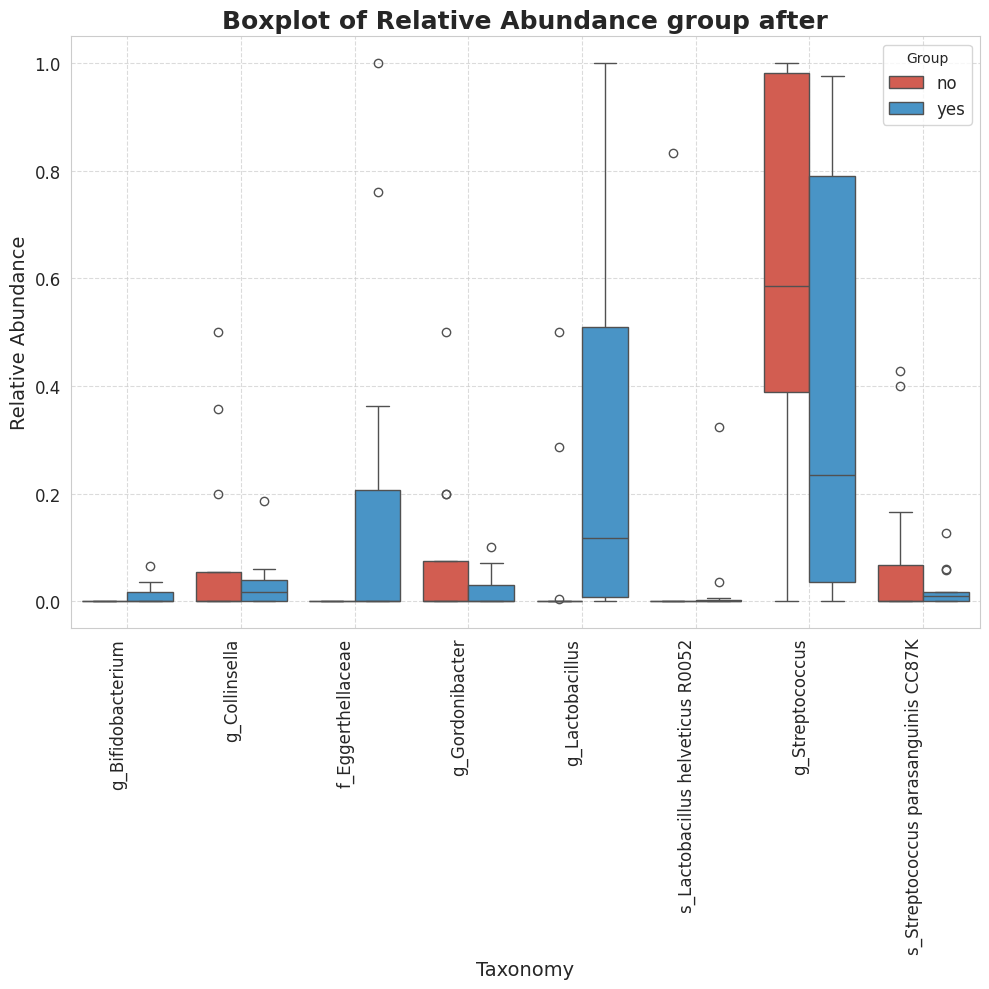

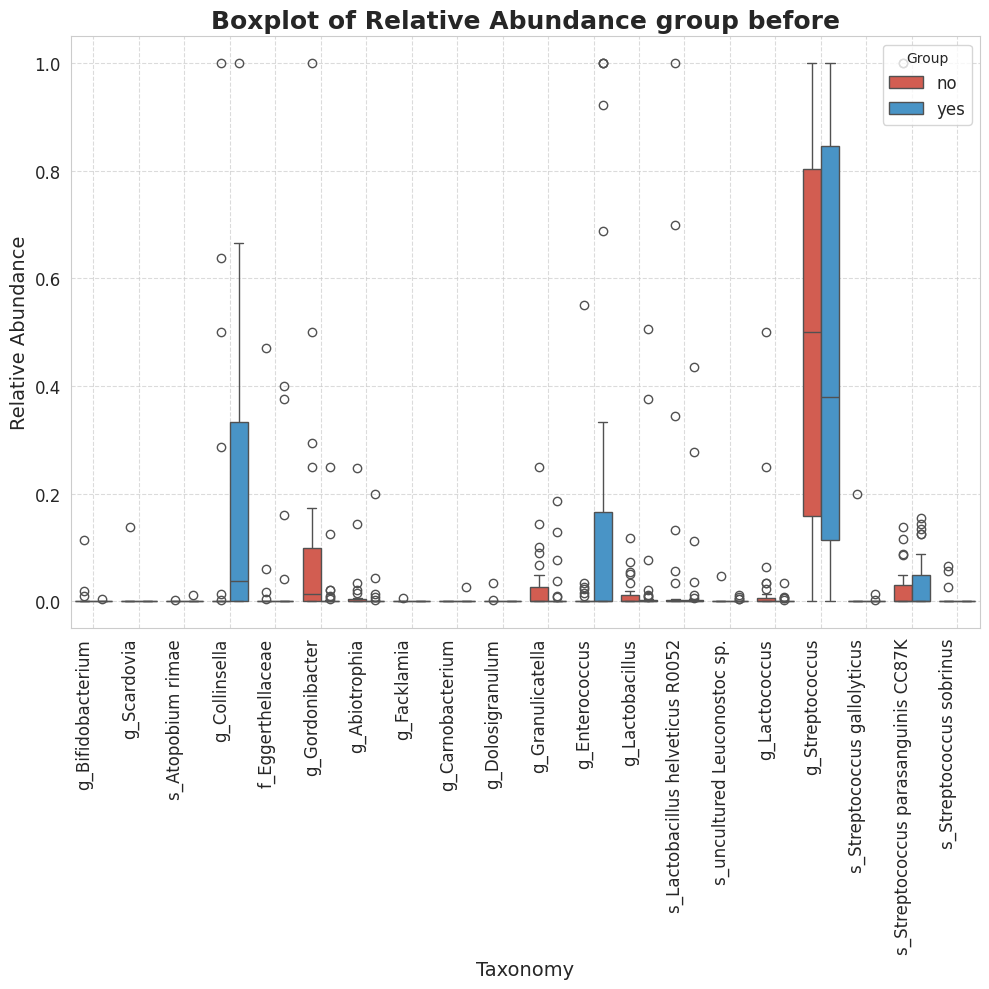

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def visual_boxplot_yes_no(df, gr='after'):
    # Шаг 1: Расчёт относительного изобилия
    sample_columns = [col for col in df.columns if col != 'Taxonomy']
    df.loc[:, sample_columns] = df[sample_columns].div(df[sample_columns].sum(), axis=1)

    # Шаг 2: Переупорядочивание столбцов
    ordered_columns = ['Taxonomy'] + sample_columns
    df = df[ordered_columns]

    # Шаг 3: Перевод в "длинный" формат
    melted_df = df.melt(id_vars='Taxonomy', var_name='Sample', value_name='Relative Abundance')

    # Шаг 4: Определение групп "yes" и "no"
    melted_df['Group'] = melted_df['Sample'].apply(lambda x: 'yes' if 'yes' in x else 'no')
    # Настройка визуализации
    sns.set_style("whitegrid")

    # Расчёт p-значений
    significant_taxa = {}
    for taxon in melted_df['Taxonomy'].unique():
        yes_values = melted_df[(melted_df['Taxonomy'] == taxon) & (melted_df['Group'] == 'yes')]['Relative Abundance']
        no_values = melted_df[(melted_df['Taxonomy'] == taxon) & (melted_df['Group'] == 'no')]['Relative Abundance']
        
        if len(yes_values) > 1 and len(no_values) > 1:
            t_stat, p_val = ttest_ind(yes_values, no_values, nan_policy='omit')
    #        if p_val < 0.05:
            significant_taxa[taxon] = p_val

    # Фильтрация для значимых таксонов
    significant_melted_df = melted_df[melted_df['Taxonomy'].isin(significant_taxa.keys())]

    # Визуализация
    palette = {'yes': '#3498db', 'no': '#e74c3c'}
    plt.figure(figsize=(10, 10))
    group_order = ['no', 'yes']
    sns.boxplot(x='Taxonomy', y='Relative Abundance', hue='Group', data=significant_melted_df, palette=palette, hue_order=group_order)

    # Оформление графика
    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Taxonomy', fontsize=14)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.title(f'Boxplot of Relative Abundance group {gr}', fontsize=18, fontweight='bold')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.legend(loc="upper right", fontsize=12, title="Group")
    plt.tight_layout()
    plt.savefig(f'figures/Boxplot of Relative Abundance group {gr}.pdf', bbox_inches = 'tight')
    for taxon, p_val in significant_taxa.items():
        print(f"Таксон: {taxon}, p-value: {p_val:.4f}")
    print('\n\n')


visual_boxplot_yes_no(viz_after_group_final)
visual_boxplot_yes_no(viz_before_group_final, 'before')

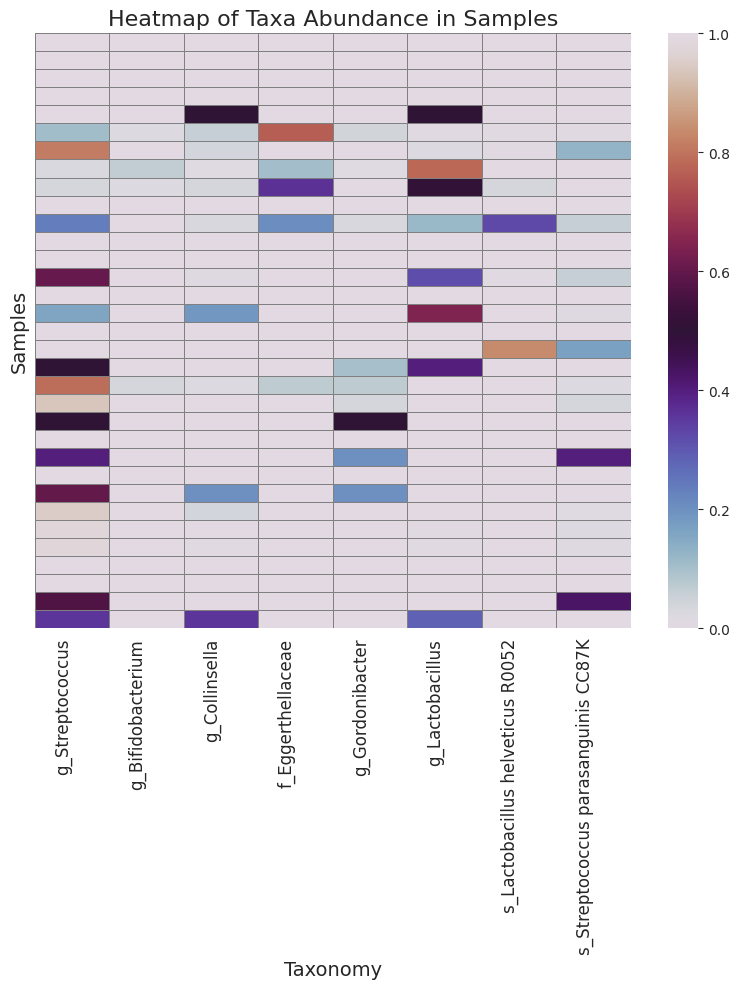

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагая, что viz_after_group_final уже подготовлен
# Заменяем NaN на 0 для корректного отображения данных
viz_after_group_final.fillna(0, inplace=True)

# Транспонируем DataFrame для визуализации (таксоны в строках, образцы в столбцах)
transposed_df = viz_after_group_final.set_index('Taxonomy').T

# Упорядочивание данных, если необходимо
# Например, можно упорядочить по среднему значению каждого таксона
ordered_taxa = transposed_df.median().sort_values(ascending=False).index
transposed_df = transposed_df[ordered_taxa]

# Создание тепловой карты с улучшениями
plt.figure(figsize=(8, 10))
sns_heatmap = sns.heatmap(transposed_df, cmap='twilight', linewidths=0.5, linecolor='gray')

# Улучшение оформления
plt.title('Heatmap of Taxa Abundance in Samples', fontsize=16)
plt.ylabel('Samples', fontsize=14)
plt.xlabel('Taxonomy', fontsize=14)
plt.xticks(fontsize=12, rotation=90, ha='right')  # Поворачиваем подписи таксономий для лучшей читаемости
plt.yticks([])  # Удалено для исключения меток по оси y

# Добавление цветовой шкалы
#plt.colorbar(sns_heatmap.collections[0], label='Relative Abundance')  # Ясное описание легенды
plt.savefig('figures/heatmap_after.pdf', bbox_inches = 'tight')
plt.tight_layout()  # Автоматическая корректировка подписей, чтобы они не перекрывались
plt.show()

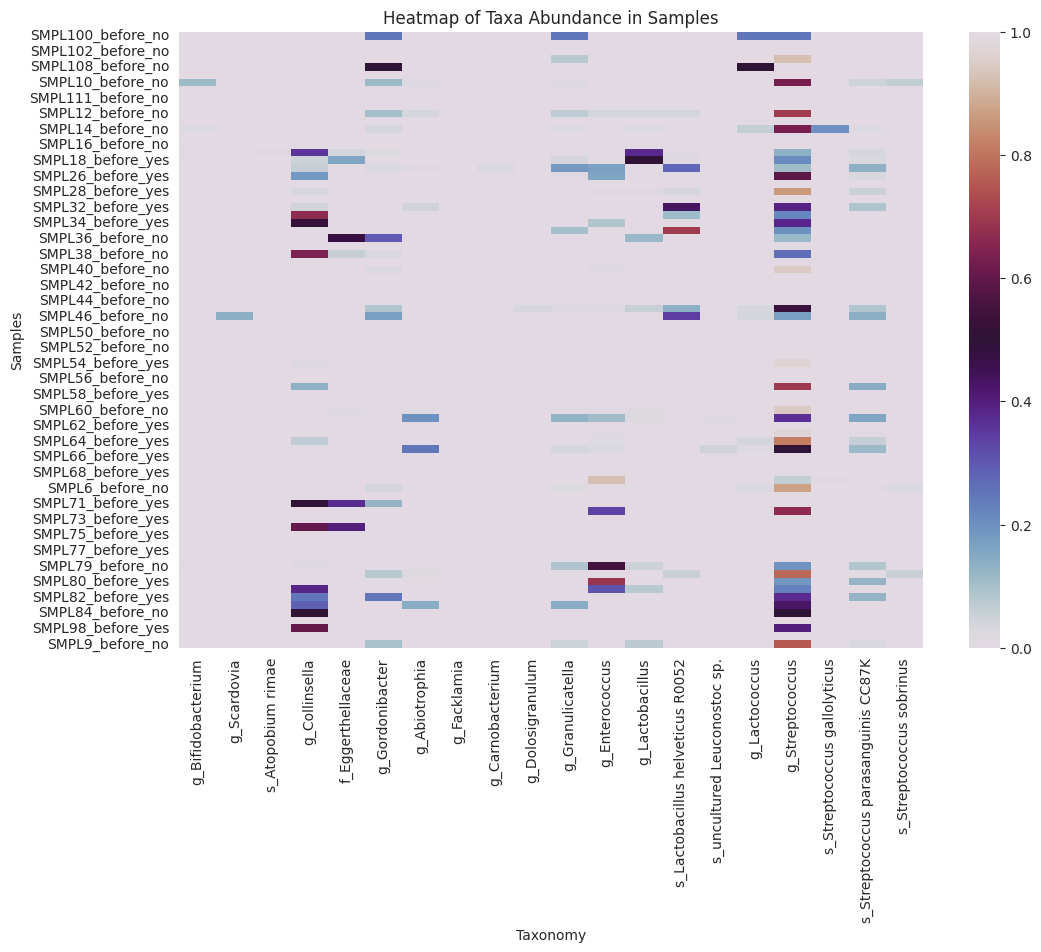

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что viz_after_group_final - это ваш DataFrame

# Заменяем NaN на 0 для корректного отображения данных
viz_before_group_final.fillna(0, inplace=True)

# Транспонируем DataFrame для визуализации (таксоны в строках, образцы в столбцах)
transposed_df = viz_before_group_final.set_index('Taxonomy').T

# Создание тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(transposed_df, cmap='twilight')
plt.title('Heatmap of Taxa Abundance in Samples')
plt.ylabel('Samples')
plt.xlabel('Taxonomy')
plt.show()


In [207]:
import pandas as pd
from skbio.diversity import alpha_diversity

viz_afteralpha = viz_after_alpha.T

df = viz_afteralpha.iloc[0:]  # Удаляем первую строку (нумерацию)
df.columns = df.iloc[0]  # Заголовки столбцов
df = df[1:]  # Удаляем строку с заголовками из данных

df = df.apply(pd.to_numeric, errors='coerce')

alpha_diversity_results = alpha_diversity('shannon', df.values, df.index)
group_yes = alpha_diversity_results[df.index.str.contains('_yes')]
group_no = alpha_diversity_results[df.index.str.contains('_no')]

# Добавляем результаты в датафрейм
df_alpha = df.copy()
df_alpha_four = df_alpha.copy()
df_alpha['alpha_diversity'] = alpha_diversity_results


/home/esp/python csv/Samat/04.01.2024/env/lib/python3.11/site-packages/skbio/diversity/alpha/_base.py:869: RuntimeWarning: invalid value encountered in divide
  freqs = counts / counts.sum()


In [208]:
import pandas as pd
from skbio.diversity import alpha_diversity
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Расчет альфа-разнообразия
df_alpha_four['shannon'] = alpha_diversity('shannon', df_alpha_four.iloc[:, 1:], df_alpha_four.index)
df_alpha_four['simpson'] = alpha_diversity('simpson', df_alpha_four.iloc[:, 1:], df_alpha_four.index)
df_alpha_four['richness'] = df_alpha_four.iloc[:, 1:].apply(lambda x: (x > 0).sum(), axis=1)
df_alpha_four['observed'] = alpha_diversity('observed_otus', df_alpha_four.iloc[:, 1:], df_alpha_four.index)

# Разделение данных на группы 'yes' и 'no'
group_yes = df_alpha_four[df_alpha_four.index.str.contains('_yes')].fillna(0)
group_no = df_alpha_four[df_alpha_four.index.str.contains('_no')].fillna(0)

# Проведение статистических тестов и расчет p-value для каждой метрики
def calculate_p_value(group1, group2, metric):
    stat, p = shapiro(group1[metric])
    if p > 0.05:  # Если данные нормально распределены, используем t-тест
        stat, p_value = ttest_ind(group1[metric], group2[metric])
    else:  # Если данные не нормально распределены, используем тест Манна-Уитни
        stat, p_value = mannwhitneyu(group1[metric], group2[metric])
    return p_value

metrics = ['shannon', 'simpson', 'richness', 'observed']
p_values = {metric: calculate_p_value(group_yes, group_no, metric) for metric in metrics}
df_alpha_four['GROUP'] = ['yes' if '_yes' in index else 'no' for index in df_alpha_four.index]



/home/esp/python csv/Samat/04.01.2024/env/lib/python3.11/site-packages/skbio/diversity/alpha/_base.py:869: RuntimeWarning: invalid value encountered in divide
  freqs = counts / counts.sum()


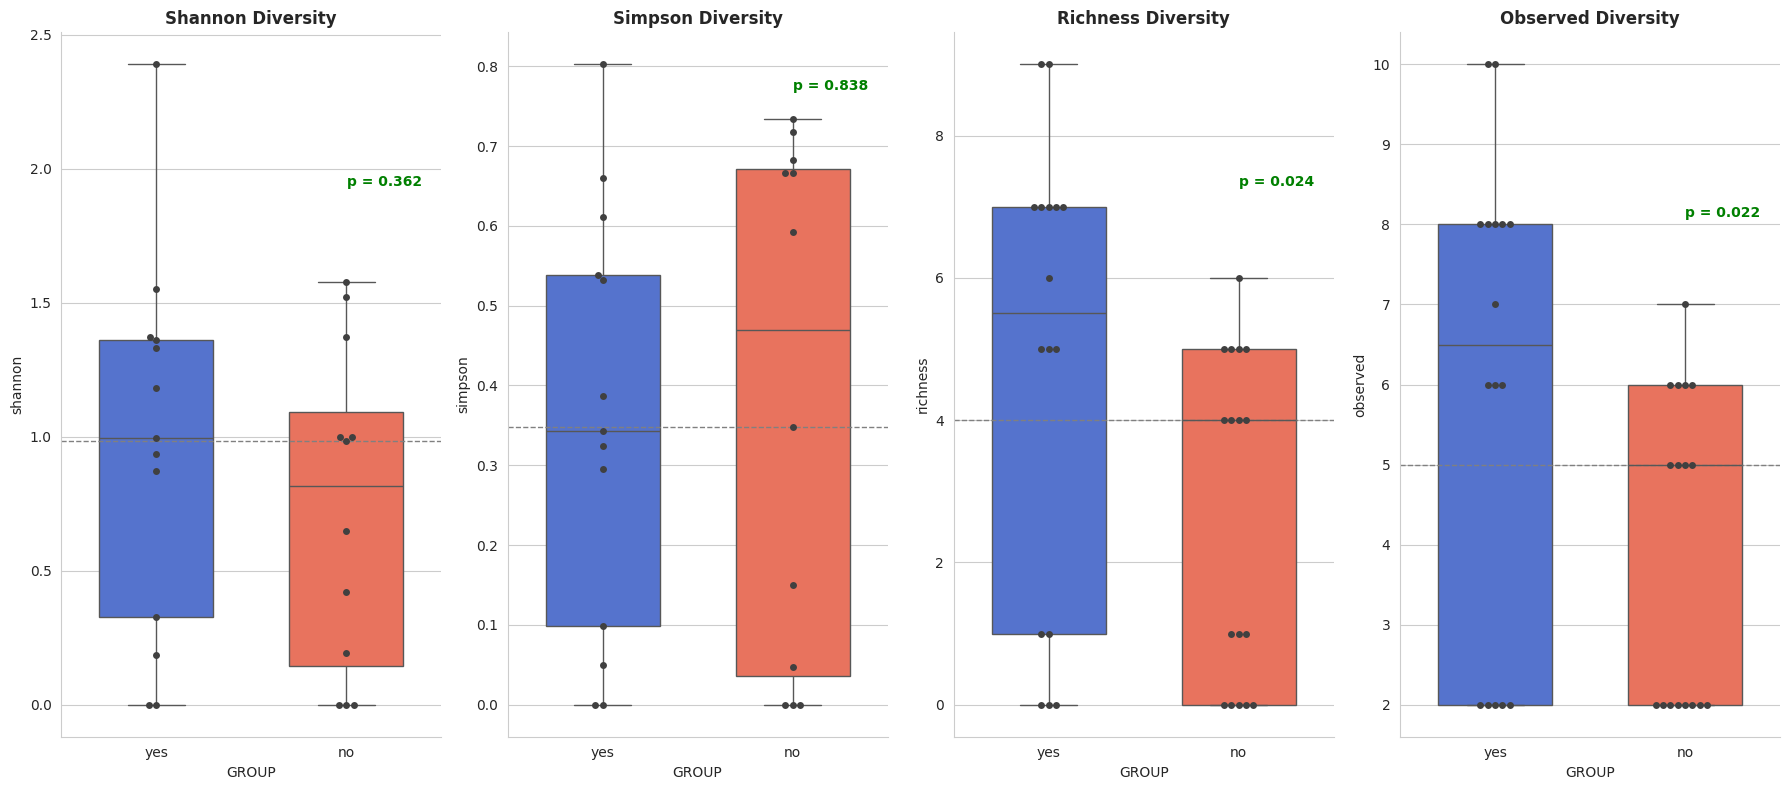

In [209]:
plt.figure(figsize=(18, 8))
palette = {"yes": "royalblue", "no": "tomato"}

plt.subplot(1, 4, 1)
sns.boxplot(x='GROUP', y='shannon', data=df_alpha_four, palette=palette, hue='GROUP', width=0.6, dodge=False)
sns.swarmplot(x='GROUP', y='shannon', data=df_alpha_four, color=".25")
plt.title('Shannon Diversity', fontweight="bold")
plt.text(1.2, max(df_alpha_four['shannon']) * 0.805, f'p = {p_values["shannon"]:.3f}', ha='center', va='bottom', color='green', fontsize=10, fontweight="bold")
plt.axhline(df_alpha_four['shannon'].median(), color='gray', linestyle='dashed', linewidth=1)

plt.subplot(1, 4, 2)
sns.boxplot(x='GROUP', y='simpson', data=df_alpha_four, palette=palette, hue='GROUP', width=0.6, dodge=False)
sns.swarmplot(x='GROUP', y='simpson', data=df_alpha_four, color=".25")
plt.title('Simpson Diversity', fontweight="bold")
plt.text(1.2, max(df_alpha_four['simpson']) * 0.955, f'p = {p_values["simpson"]:.3f}', ha='center', va='bottom', color='green', fontsize=10, fontweight="bold")
plt.axhline(df_alpha_four['simpson'].median(), color='gray', linestyle='dashed', linewidth=1)

plt.subplot(1, 4, 3)
sns.boxplot(x='GROUP', y='richness', data=df_alpha_four, palette=palette, hue='GROUP', width=0.6, dodge=False)
sns.swarmplot(x='GROUP', y='richness', data=df_alpha_four, color=".25")
plt.title('Richness Diversity', fontweight="bold")
plt.text(1.2, max(df_alpha_four['richness']) * 0.805, f'p = {p_values["richness"]:.3f}', ha='center', va='bottom', color='green', fontsize=10, fontweight="bold")
plt.axhline(df_alpha_four['richness'].median(), color='gray', linestyle='dashed', linewidth=1)

plt.subplot(1, 4, 4)
sns.boxplot(x='GROUP', y='observed', data=df_alpha_four, palette=palette, hue='GROUP', width=0.6, dodge=False)
sns.swarmplot(x='GROUP', y='observed', data=df_alpha_four, color=".25")
plt.title('Observed Diversity', fontweight="bold")
plt.text(1.2, max(df_alpha_four['observed']) * 0.805, f'p = {p_values["observed"]:.3f}', ha='center', va='bottom', color='green', fontsize=10, fontweight="bold")
plt.axhline(df_alpha_four['observed'].median(), color='gray', linestyle='dashed', linewidth=1)

sns.despine()

plt.tight_layout()
plt.savefig('figures/alpha_beta/alpha.pdf', bbox_inches = 'tight')
# Отображаем график
plt.show()

/home/esp/python csv/Samat/04.01.2024/env/lib/python3.11/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.11499484928922006 and the largest is 2.554301013484919.
  warn(
/home/esp/python csv/Samat/04.01.2024/env/lib/python3.11/site-packages/matplotlib/patches.py:1566: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
/home/esp/python csv/Samat/04.01.2024/env/lib/python3.11/site-pac

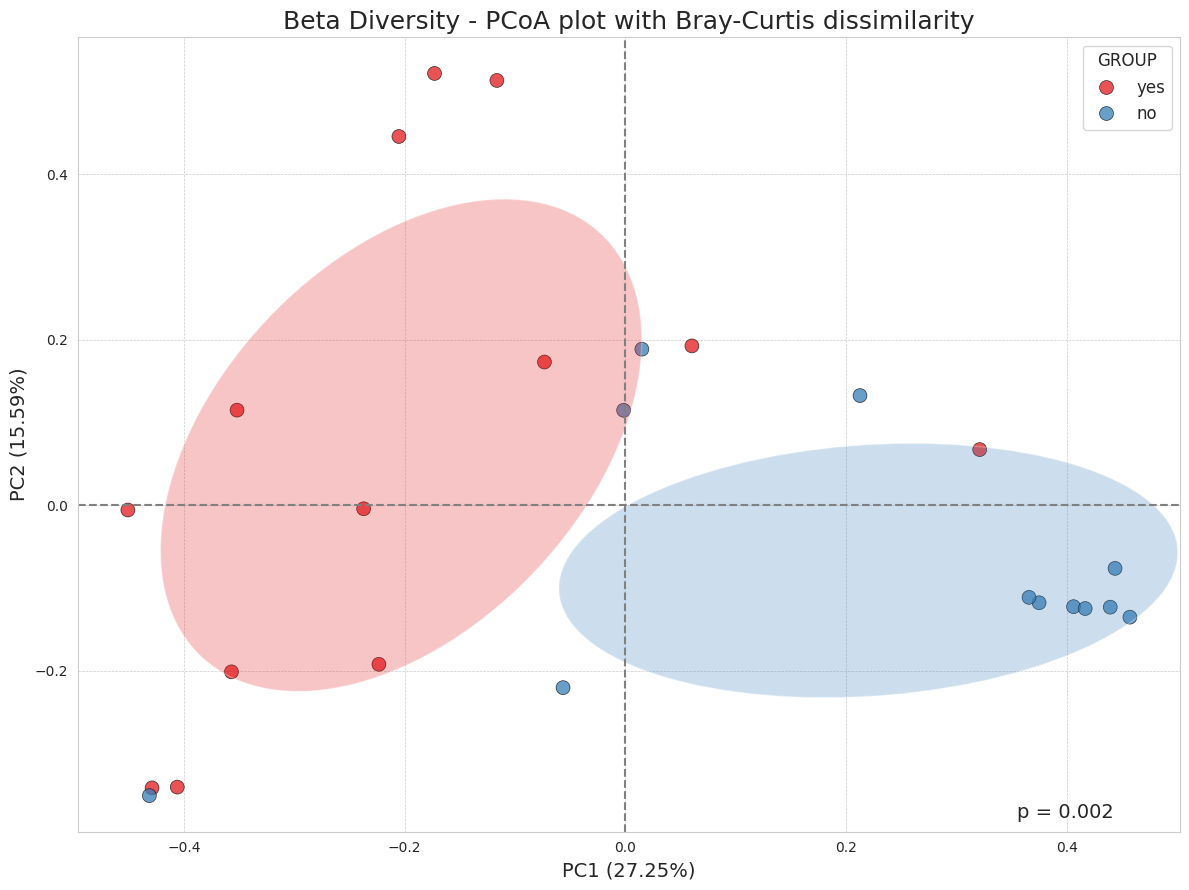

In [210]:
import pandas as pd
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse
from skbio.stats.distance import permanova

# Копирование и добавление столбца 'GROUP'
beta_start_df = df.copy()
beta_start_df['GROUP'] = ['yes' if '_yes' in index else 'no' for index in df_alpha_four.index]
beta_start_df = beta_start_df.fillna(0)

# Фильтрация DataFrame
df_filtered = beta_start_df[beta_start_df.iloc[:, 1:-1].sum(axis=1) > 0.0001]

# Расчет бета-разнообразия для отфильтрованных данных
beta_diversity_results = beta_diversity("braycurtis", df_filtered.iloc[:, 1:-1].values, df_filtered.index)

# PCoA (Principal Coordinate Analysis)
pcoa_results = pcoa(beta_diversity_results)
pcoa_df = pd.DataFrame(pcoa_results.samples, columns=['PC1', 'PC2', 'PC3'])
pcoa_df['GROUP'] = df_filtered['GROUP']

# Рисование элипсов вокруг групп точек
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 2):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs))

# Расчет PERMANOVA
permanova_results = permanova(beta_diversity_results, df_filtered['GROUP'])

# Извлечение p-значения
p_val = permanova_results['p-value']

# Визуализация PCoA с эллипсами и p-значением
plt.figure(figsize=(12, 9))
sns.scatterplot(x='PC1', y='PC2', hue='GROUP', data=pcoa_df, s=100, alpha=0.75, palette="Set1", edgecolor="black", linewidth=0.5)
for label, group_df in pcoa_df.groupby("GROUP"):
    draw_ellipse(group_df[["PC1", "PC2"]].mean(), group_df[["PC1", "PC2"]].cov(), alpha=0.25, facecolor=sns.color_palette("Set1").as_hex()[0 if label == 'yes' else 1])
plt.title("Beta Diversity - PCoA plot with Bray-Curtis dissimilarity", fontsize=18)
plt.xlabel(f"PC1 ({pcoa_results.proportion_explained.iloc[0]:.2%})", fontsize=14)
plt.ylabel(f"PC2 ({pcoa_results.proportion_explained.iloc[1]:.2%})", fontsize=14)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(title='GROUP', fontsize=12, title_fontsize=12)

# Добавление p-значения на график
plt.text(.94, 0.012, f"p = {p_val:.3f}", ha="right", va="bottom", transform=plt.gca().transAxes, fontsize=14)

plt.tight_layout()
plt.savefig('figures/alpha_beta/beta.pdf', bbox_inches = 'tight')
plt.show()


In [211]:
df_filtered

Taxonomy,g_Bifidobacterium,g_Collinsella,f_Eggerthellaceae,g_Gordonibacter,g_Lactobacillus,s_Lactobacillus helveticus R0052,g_Streptococcus,s_Streptococcus parasanguinis CC87K,GROUP
SMPL0_after_yes,0,0,0,0,38,0,0,0,yes
SMPL104_after_no,0,0,0,0,0,0,1,0,no
SMPL107_after_no,0,1,0,0,1,0,0,0,no
SMPL19_after_yes,7,24,309,17,3,1,43,2,yes
SMPL1_after_yes,0,31,0,0,14,2,626,98,yes
SMPL20_after_yes,12,2,19,2,142,0,5,0,yes
SMPL21_after_yes,1,2,20,0,28,2,2,0,yes
SMPL23_after_yes,0,1,7,1,4,11,8,2,yes
SMPL24_after_yes,0,0,3,0,0,0,0,0,yes
SMPL2_after_yes,0,2,0,0,53,1,100,10,yes


/home/esp/python csv/Samat/04.01.2024/env/lib/python3.11/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.16619976123707642 and the largest is 2.0458619350576597.
  warn(
/home/esp/python csv/Samat/04.01.2024/env/lib/python3.11/site-packages/matplotlib/patches.py:1566: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
/home/esp/python csv/Samat/04.01.2024/env/lib/python3.11/site-pa

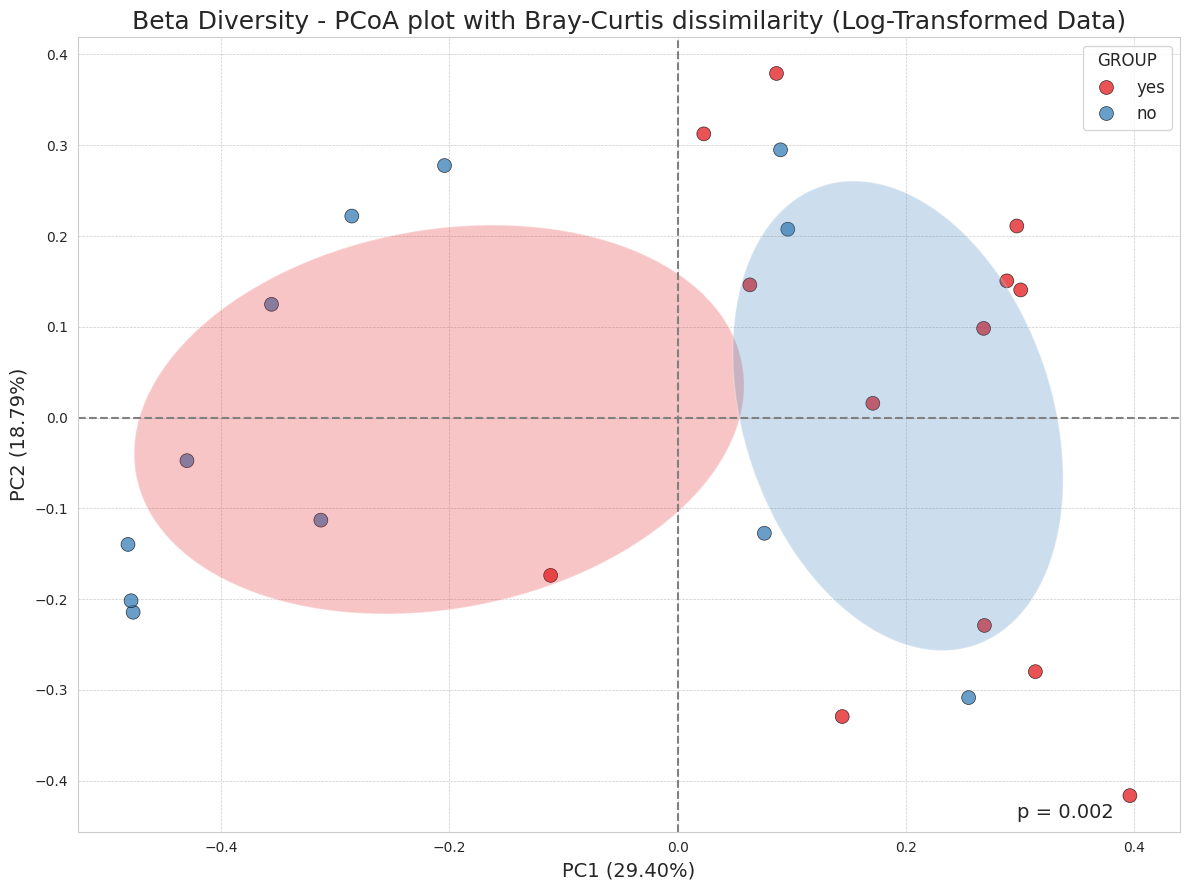

In [212]:
# Логарифмируем данные
log_transformed_data = np.log1p(df_filtered.drop(columns=['GROUP']))

# Расчет бета-разнообразия для логарифмированных данных
log_bc_distances = beta_diversity('braycurtis', log_transformed_data, log_transformed_data.index)

# PCoA для логарифмированных данных
log_pcoa_results = pcoa(log_bc_distances)

# Визуализация результатов PCoA для логарифмированных данных
log_pcoa_df = pd.DataFrame(log_pcoa_results.samples, columns=['PC1', 'PC2', 'PC3'])
log_pcoa_df['GROUP'] = beta_start_df.loc[df_filtered.index, 'GROUP']

# График PCoA для логарифмированных данных
plt.figure(figsize=(12, 9))
sns.scatterplot(x='PC1', y='PC2', hue='GROUP', data=log_pcoa_df, s=100, alpha=0.75, palette="Set1", edgecolor="black", linewidth=0.5)
for label, group_df in log_pcoa_df.groupby("GROUP"):
    draw_ellipse(group_df[["PC1", "PC2"]].mean(), group_df[["PC1", "PC2"]].cov(), alpha=0.25, facecolor=sns.color_palette("Set1").as_hex()[0 if label == 'no' else 1])
plt.title("Beta Diversity - PCoA plot with Bray-Curtis dissimilarity (Log-Transformed Data)", fontsize=18)
plt.xlabel(f"PC1 ({log_pcoa_results.proportion_explained.iloc[0]:.2%})", fontsize=14)
plt.ylabel(f"PC2 ({log_pcoa_results.proportion_explained.iloc[1]:.2%})", fontsize=14)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(title='GROUP', fontsize=12, title_fontsize=12)

# Добавление p-значения на график
plt.text(.94, 0.012, f"p = {p_val:.3f}", ha="right", va="bottom", transform=plt.gca().transAxes, fontsize=14)
plt.savefig('figures/alpha_beta/logged_beta.pdf', bbox_inches = 'tight')
plt.tight_layout()
plt.show()